# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

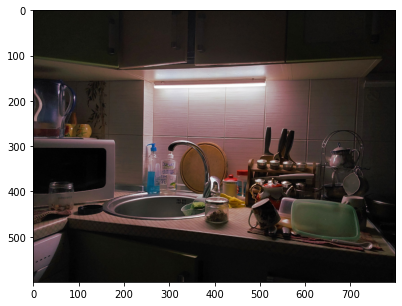

In [21]:
img = cv2.imread('./image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x248946f9f00>)

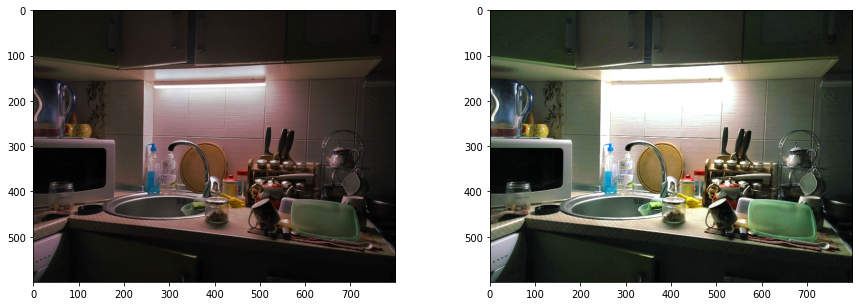

In [22]:
# Define white patch and the coefficients
row, col = 165, 300 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x248952ce4a0>)

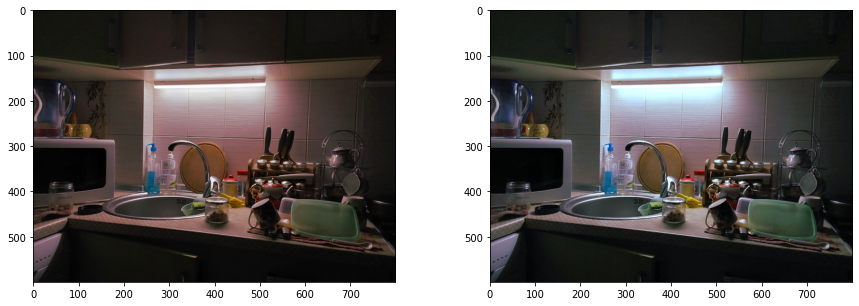

In [32]:
# Load your image
img = cv2.imread('./image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0

r, g, b = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = r.mean()
mean_g = g.mean()
mean_b = b.mean()


# Compute the coefficients kr, kg, kb
biggest = max(mean_r, mean_g, mean_b)
kr = biggest / mean_r
kg = biggest / mean_g
kb = biggest / mean_b


# Apply color balancing and generate the balanced image
balanced = cv2.merge([r*kr, g*kg, b*kb])

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2489ab582b0>)

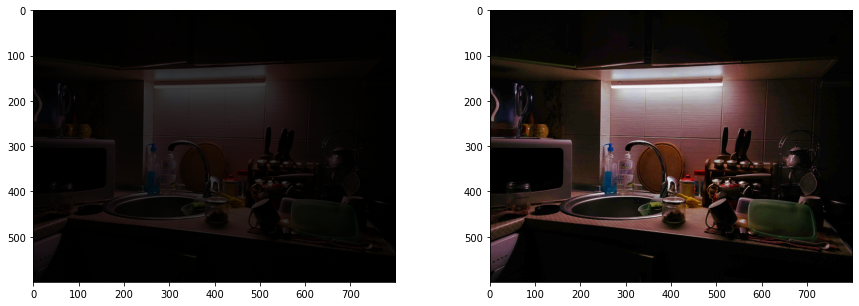

In [39]:
# Load your image
img = cv2.imread('./image_dark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0

r, g, b = cv2.split(img)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = r.max()
max_g = g.max()
max_b = b.max()

# Apply scale-by-max balancing and generate the balanced image
balanced = cv2.merge([r / max_r, g / max_g, b / max_b])

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)